<a href="https://colab.research.google.com/github/Yash1289/Book_Recommendations/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books_path = "/content/drive/MyDrive/Colab Notebooks/data_book_recommendation/Books.csv"
ratings_path = "/content/drive/MyDrive/Colab Notebooks/data_book_recommendation/Ratings.csv"
users_path = "/content/drive/MyDrive/Colab Notebooks/data_book_recommendation/Users.csv"

In [ ]:

ratings_df = pd.read_csv(ratings_path , low_memory = False)
users_df = pd.read_csv(users_path , low_memory = False)

In [63]:
books_df = pd.read_csv(books_path , low_memory=False)

In [ ]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [ ]:
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [ ]:
def stateExtractor(locationsValues):
  try:
    return locationsValues.split(", ")[1]
  except:
    return " "

In [ ]:
def countryExtractor(locationsValues):
  try:
    return locationsValues.split(", ")[2]
  except:
    return " "

In [ ]:
users_df["City"] = users_df["Location"].apply( lambda x : x.split(", ")[0])
users_df["State"] = users_df["Location"].apply(stateExtractor)
users_df["Country"] = users_df["Location"].apply(countryExtractor)

In [ ]:
users_df["Age"] = np.where(users_df["Age"] > 100 , 0 , users_df["Age"])
users_df["Age"] = np.where(users_df["Age"] < 10 , 0 , users_df["Age"])

users_df["Age"] = users_df["Age"].fillna(0)

In [ ]:
def AgeGroups(age):
  if age < 10:
    return np.nan
  elif age <= 12:
    return "Children"
  elif age <= 20:
    return "Teenager"
  elif age <= 30:
    return "Youth"
  elif age <= 40:
    return "Middle Aged"
  elif age <= 60:
    return "Adulthood"
  else:
    return "Seniors"

In [ ]:
users_df["Age-Group"] = users_df["Age"].apply(AgeGroups)

In [ ]:
users_df.head()

,User-ID,Location,Age,City,State,Country,Age-Group
0,1,"nyc, new york, usa",0.0,nyc,new york,usa,NaN
1,2,"stockton, california, usa",18.0,stockton,california,usa,Teenager
2,3,"moscow, yukon territory, russia",0.0,moscow,yukon territory,russia,NaN
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,Teenager
4,5,"farnborough, hants, united kingdom",0.0,farnborough,hants,united kingdom,NaN


In [70]:
books_df["Year-Of-Publication"].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', '1909', '2008', '1378', '1919', '1922',
       '1

In [65]:
dk_index = books_df[books_df["Year-Of-Publication"] == "DK Publishing Inc"].index

for indexNo in list(dk_index):
  books_df.iloc[indexNo , 2 : ] = books_df.iloc[indexNo , 2 : ].shift()

In [68]:
dk_index = books_df[books_df["Year-Of-Publication"] == "Gallimard"].index

for indexNo in list(dk_index):
  books_df.iloc[indexNo , 2 : ] = books_df.iloc[indexNo , 2 : ].shift()

In [71]:
books_df["Year-Of-Publication"] = books_df["Year-Of-Publication"].astype(int)

In [78]:
h = 1998
j = h%10

str(h - j) + "s"

'1990s'

In [79]:
def DecadeDecider(year):

  if year > 2020 or year < 1900 :
    return np.nan
  else :
    rem = year%10
    return str(year - rem) + "s"


In [80]:
books_df["Decade"] = books_df["Year-Of-Publication"].apply(DecadeDecider)

In [81]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Decade
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2000s
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2000s
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1990s
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1990s
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1990s
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1980s
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1990s
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2000s
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1990s


In [ ]:
print(books_df.shape)
print(ratings_df.shape)
print(users_df.shape)

(271360, 8)
(1149780, 3)
(278858, 7)


In [ ]:
explicit_ratings_df = ratings_df[ratings_df["Book-Rating"] != 0]
explicit_userids = list(explicit_ratings_df["User-ID"].unique())
explicit_users_df = users_df[users_df["User-ID"].isin(explicit_userids)]

In [ ]:
explicit_ratings_df = explicit_ratings_df.groupby("ISBN").filter(lambda x : len(x) >= 15)
explicit_ratings_df["ISBN"].value_counts()

0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
             ... 
0375701427     15
0743456173     15
044022330X     15
0060191988     15
0679447156     15
Name: ISBN, Length: 3244, dtype: int64

In [ ]:
explicit_ratings_df[explicit_ratings_df.duplicated(subset = ["User-ID" , "ISBN"])]

,User-ID,ISBN,Book-Rating


In [ ]:
explicit_ratings_df["User-ID"].nunique()

35378

In [ ]:
books_ratings_df = pd.merge(explicit_ratings_df , books_df , on = ["ISBN"])

In [ ]:
books_ratings_df["User-ID"].nunique()

34573

In [ ]:
books_ratings_df[books_ratings_df["ISBN"].str.len() != 10 ]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
users_books_ratings_df = pd.merge(books_ratings_df , explicit_users_df , on =["User-ID"])
users_books_ratings_df["User-ID"].nunique()

34573

In [ ]:
users_books_ratings_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country,Age-Group
0,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",0.0,torrance,california,usa,NaN
1,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"n/a, n/a, n/a",0.0,n/a,n/a,n/a,NaN
2,11676,0671537458,8,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,"n/a, n/a, n/a",0.0,n/a,n/a,n/a,NaN
3,11676,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,"n/a, n/a, n/a",0.0,n/a,n/a,n/a,NaN
4,11676,0684867621,3,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,"n/a, n/a, n/a",0.0,n/a,n/a,n/a,NaN


In [ ]:
users_ratedBooks_count_df = users_books_ratings_df.groupby(['User-ID', 'ISBN']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_ratedBooks_count_df))

users_with_enough_ratedBooks_df = users_ratedBooks_count_df[users_ratedBooks_count_df >= 15].reset_index()[['User-ID']]
print('# of users with at least 15 interactions: %d' % len(users_with_enough_ratedBooks_df))

# of users: 34573
# of users with at least 15 interactions: 1266


In [ ]:
print('# of interactions: %d' % len(users_books_ratings_df))
ratings_from_selected_users_df = users_books_ratings_df.merge(users_with_enough_ratedBooks_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 15 interactions: %d' % len(ratings_from_selected_users_df))

# of interactions: 112631
# of interactions from users with at least 15 interactions: 41252


In [ ]:
dupilcate_books_index = ratings_from_selected_users_df[ratings_from_selected_users_df.duplicated( subset = ["User-ID" , "Book-Title"], keep= "last")].index
ratings_from_selected_users_df.drop(dupilcate_books_index , inplace = True)

In [ ]:
ratings_from_selected_users_df.shape

(41024, 16)

In [ ]:
recSys_df = ratings_from_selected_users_df.copy()

# **EDA**

In [30]:
eda_books_ratings_df = pd.merge(explicit_ratings_df , books_df , on = ["ISBN"])
recSys_eda_df = pd.merge(eda_books_ratings_df , explicit_users_df , on =["User-ID"])

In [ ]:
#Importing the seaborn and matplotlib library for our data visualization tasks
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = 10,7
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')

year of publication vs rating ka dekh lena bro lineplot bhi ban sakta hai ok

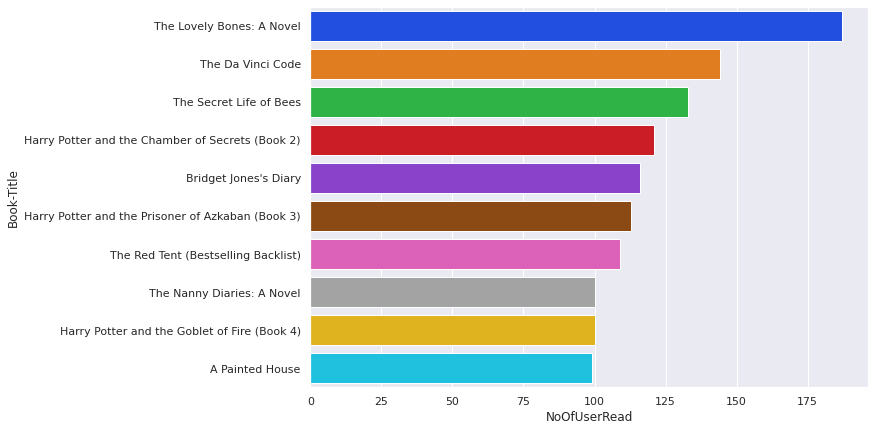

In [ ]:
top10PopularBooks = pd.DataFrame(recSys_df["Book-Title"].value_counts()).reset_index().rename(columns = { "index" : "Book-Title" , "Book-Title" : "NoOfUserRead"}).head(10)

sns.barplot(y="Book-Title", x = "NoOfUserRead", data=top10PopularBooks, palette = "bright" ,orient = "h")
plt.show()

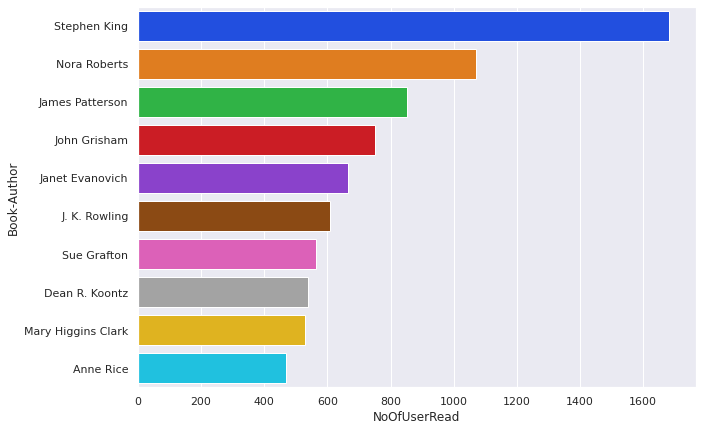

In [ ]:
top10PopularAuthors = pd.DataFrame(recSys_df["Book-Author"].value_counts()).reset_index().rename(columns = { "index" : "Book-Author" , "Book-Author" : "NoOfUserRead"}).head(10)

sns.barplot(y="Book-Author", x = "NoOfUserRead", data=top10PopularAuthors, palette = "bright" ,orient = "h")
plt.show()

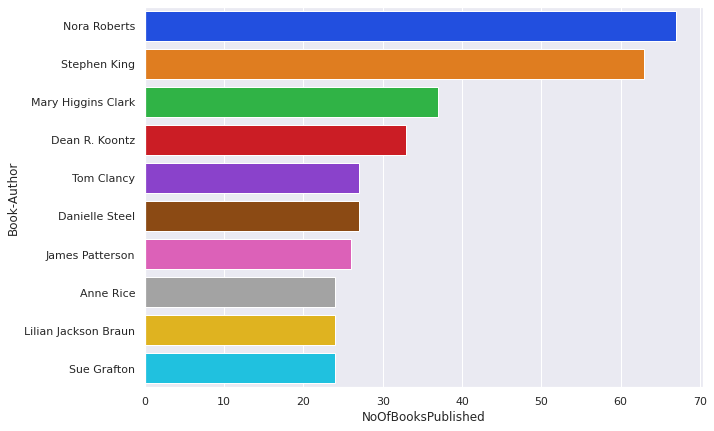

In [ ]:
AuthorBookFreq = recSys_df.groupby(["Book-Author"]).agg({ "Book-Title" : pd.Series.nunique}).reset_index().sort_values(by = "Book-Title" , ascending = False)
top10AuthorBookFreq = AuthorBookFreq.rename(columns = { "Book-Title" : "NoOfBooksPublished"}).head(10)

sns.barplot(y="Book-Author", x = "NoOfBooksPublished", data = top10AuthorBookFreq, palette = "bright" ,orient = "h")
plt.show()

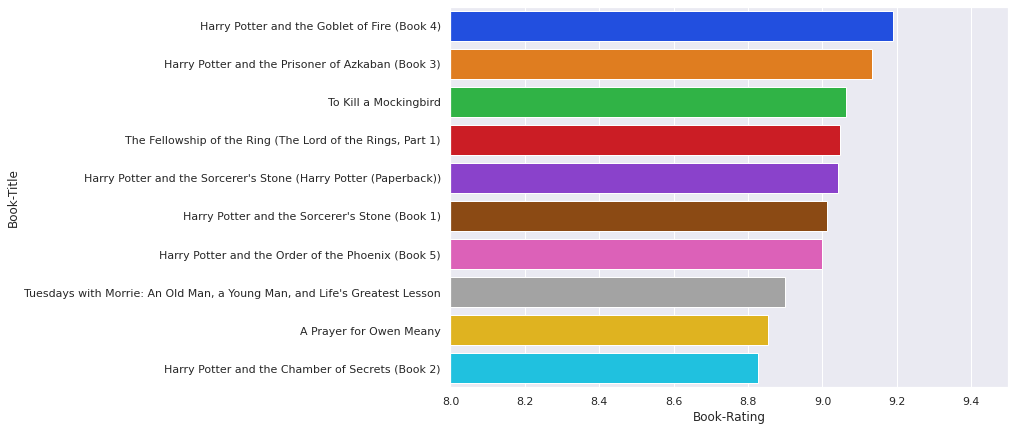

In [ ]:
HighestRatedBooks = recSys_df.groupby("Book-Title").agg({ "User-ID" : "count" , "Book-Rating" : np.mean }).reset_index().rename(columns = { "User-ID" : "UsersRead"})
top10Ratedbooks = HighestRatedBooks[HighestRatedBooks["UsersRead"] >= 50].sort_values(by = "Book-Rating" , ascending = False).head(10)

ax = sns.barplot(y="Book-Title", x = "Book-Rating", data = top10Ratedbooks, palette = "bright" ,orient = "h")
ax.set(xlim=(8, 9.5))
plt.show()

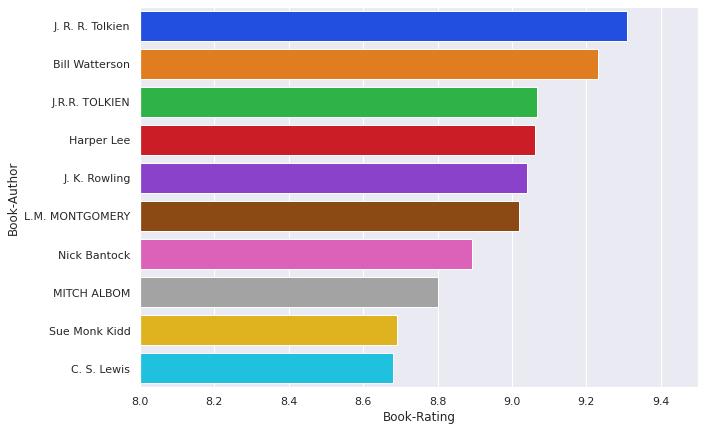

In [ ]:
HighestRatedAuthor = recSys_df.groupby("Book-Author").agg({ "User-ID" : "count" , "Book-Rating" : np.mean }).reset_index().rename(columns = { "User-ID" : "UsersRead"})
top10RatedAuthor = HighestRatedAuthor[HighestRatedAuthor["UsersRead"] >= 50].sort_values(by = "Book-Rating" , ascending = False).head(10)

ax = sns.barplot(y="Book-Author", x = "Book-Rating", data = top10RatedAuthor, palette = "bright" ,orient = "h")
ax.set(xlim=(8, 9.5))
plt.show()

In [ ]:
recSys_eda_df.groupby("Age-Group").agg({ "User-ID" : pd.Series.nunique }).reset_index()

,Age-Group,User-ID
0,Adulthood,11338
1,Children,117
2,Middle Aged,10448
3,Seniors,2275
4,Teenager,4602
5,Youth,11408


In [ ]:
EachAgeGroupRatingCount = recSys_eda_df["Age-Group"].value_counts()
EachAgeGroupRatingCount

Adulthood      83491
Middle Aged    80186
Youth          75509
Teenager       17604
Seniors         9815
Children         635
Name: Age-Group, dtype: int64

Text(0.5, 1.0, 'No of different store types')

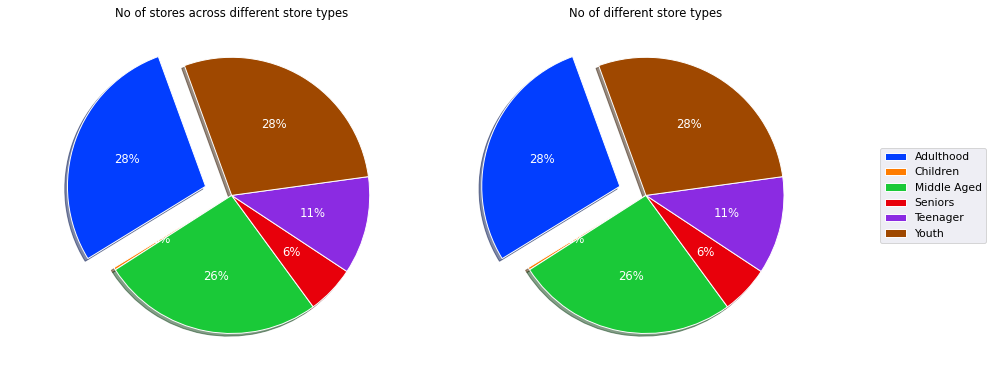

In [ ]:
#finding out the number of stores we have of each store type
EachAgeGroupFreq = recSys_eda_df.groupby("Age-Group").agg({ "User-ID" : pd.Series.nunique }).reset_index()

#Making a list of all store types
EachStoreTypeCount_list = list(EachAgeGroupFreq["Age-Group"].values)
#Making a list of frequency of each store type
EachStoreTypeCount_count = list(EachAgeGroupFreq["User-ID"].values)

''' Plotting a pie char to show the percentage of store from each Store type 
    that we have in our dataset'''

fig, axes = plt.subplots( figsize=(14,8) ,dpi=70,nrows=1, ncols=2)
totalStoreTypes = len(EachStoreTypeCount_count)

#fig = plt.figure()
#axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalStoreTypes]

explode = [0]*totalStoreTypes
explode[0] = 0.2

wedges, texts, autotexts = axes[0].pie(EachStoreTypeCount_count, explode=explode, labels = EachStoreTypeCount_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

wedges, texts, autotexts = axes[1].pie(EachStoreTypeCount_count, explode=explode, labels = EachStoreTypeCount_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

plt.legend(wedges, EachStoreTypeCount_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
axes[0].set_title("No of stores across different store types")
axes[1].set_title("No of different store types")

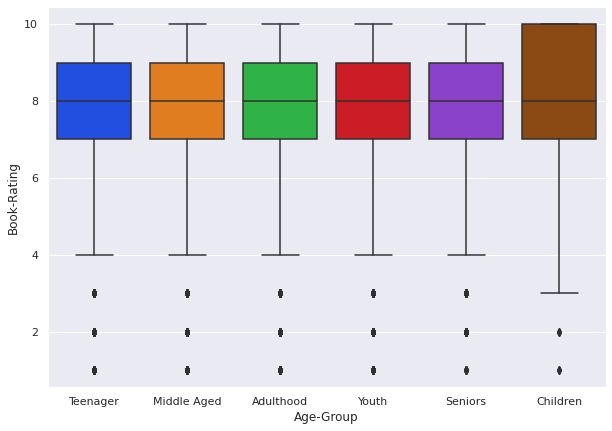

In [ ]:
sns.boxplot( x = "Age-Group" , y = "Book-Rating" , data = recSys_eda_df , palette = "bright")

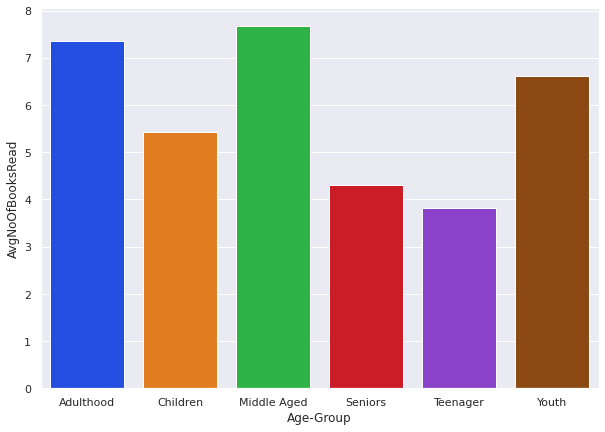

In [ ]:
ageGroupBooksRead = recSys_eda_df.groupby("Age-Group").agg({ "ISBN" : "count" , "User-ID" : pd.Series.nunique }).reset_index()
ageGroupBooksRead["AvgNoOfBooksRead"] = ageGroupBooksRead["ISBN"]/ageGroupBooksRead["User-ID"]

sns.barplot(y="AvgNoOfBooksRead", x = "Age-Group", data = ageGroupBooksRead, palette = "bright" )

In [33]:
recSys_eda_df["Year-Of-Publication"].unique()

array(['2001', '1999', '1995', '1997', '2002', '1998', '1993', '2003',
       '1991', '2000', '1987', '0', '1994', '1988', '1990', '1996',
       '2004', '1984', '1989', '1957', '1960', '1986', '1992', '1978',
       '1974', '1985', '1982', '1981', '1965', '1983', '1979', '1980',
       '1976', '1973', '1966', '1930', '1955', '1977', '1972', '1925',
       '1953', '1975', '1969', '1963', '1971', '1970', '1962', '1964',
       '1948', '1958', '1961', '1923', '1927', '1959', '1967', '1968',
       '1920', '2005', '1928', '1954', '1947', '1946', '1956', '2037',
       '1940', '1950', '1951', '1952', '1937', '2006', '2030', '1943',
       '1945', '2020', '1941', '1939', '1906', '1806', '1933', '1902',
       '1911', '1935', '1942', '1900', '1936', '1901', '1932', '2026',
       '1926', '1929', '1949', '2038', 2000, '2050', '1938', '1944',
       '2021', '1931', '1378', '1924', '1934', '1904', '2010', '2011',
       '1376', '1908'], dtype=object)

In [ ]:
recSys_eda_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country,Age-Group
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",0.0,seattle,washington,usa,NaN
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia,Teenager
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia,Teenager
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",0.0,torrance,california,usa,NaN
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"n/a, n/a, n/a",0.0,n/a,n/a,n/a,NaN


In [46]:
recSys_eda_df[recSys_eda_df["Year-Of-Publication"] == '2037' ]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country,Age-Group
16527,172331,068471809X,10,To Have and Have Not,Ernest Hemingway,2037,Simon &amp; Schuster,http://images.amazon.com/images/P/068471809X.0...,http://images.amazon.com/images/P/068471809X.0...,http://images.amazon.com/images/P/068471809X.0...,"salem, oregon, usa",27.0,salem,oregon,usa,Youth


In [32]:
recSys_eda_df["Year-Of-Publication"] = np.where(recSys_eda_df["Year-Of-Publication"] == "DK Publishing Inc" , 2000 , recSys_eda_df["Year-Of-Publication"] ) 

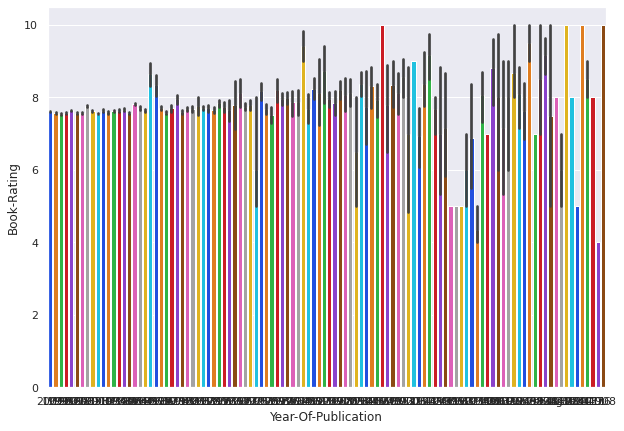

In [ ]:
YearOfPublishedAvgRating = recSys_eda_df.groupby("Year-Of-Publication").agg({ "Book-Rating" : np.mean }).reset_index().sort_values(by = "Book-Rating" , ascending = False)

sns.barplot(y = "Book-Rating" , x = "Year-Of-Publication" , data = recSys_eda_df , palette = "bright" )

# **Different Recommender System**

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 7.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630207 sha256=89a4acda30a0120258b2fde754ade51bed2f039c25ccda0ac1c05b078ca056ad
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut

from collections import defaultdict
import numpy as np

## **Popular Books Recommender**

In [ ]:
def getPopularityRanks(df, topn , userId):
  df_unread = df[df["User-ID"] != userId ]
  df_recommendation = df_unread.groupby(["Book-Title"]).agg({ "User-ID" : "count" , "Book-Rating" : "mean"}).reset_index().sort_values(by = "User-ID" , ascending = False)
  return df_recommendation.head(10)

In [ ]:
user_id = np.random.choice(recSys_df["User-ID"].values)

getPopularityRanks(recSys_df , 10 , user_id)

,Book-Title,User-ID,Book-Rating
2253,The Lovely Bones: A Novel,186,8.241935
2023,The Da Vinci Code,143,8.559441
2414,The Secret Life of Bees,133,8.691729
891,Harry Potter and the Chamber of Secrets (Book 2),121,8.826446
357,Bridget Jones's Diary,116,7.534483
895,Harry Potter and the Prisoner of Azkaban (Book 3),113,9.132743
2376,The Red Tent (Bestselling Backlist),109,8.532110
893,Harry Potter and the Goblet of Fire (Book 4),100,9.190000
2298,The Nanny Diaries: A Novel,100,7.390000
72,A Painted House,99,7.767677


## **Author Based Recommendation**

In [ ]:
def get_authors(userId , df):
  author_set = set(df[df["User-ID"] == userId]["Book-Author"])
  #refined_author_set = set([ (x.lower()).capitalize() for x in author_set])
  return list(author_set)

In [ ]:
def getPopularityRanks(df, topn , userId):
  df_unread = df[df["User-ID"] != userId ]
  df_recommendation = df_unread.groupby(["Book-Title"]).agg({ "User-ID" : "count" , "Book-Rating" : "mean"}).reset_index().sort_values(by = "User-ID" , ascending = False)
  return df_recommendation.head(10)

In [ ]:
user_id = np.random.choice(recSys_df["User-ID"].values)
authors_list = get_authors(136326 , recSys_df)
filtered_df = recSys_df[recSys_df["Book-Author"].isin(authors_list)]

In [ ]:
getPopularityRanks(filtered_df , 10 , 136326)

,Book-Title,User-ID,Book-Rating
95,The Nanny Diaries: A Novel,99,7.393939
44,Interview with the Vampire,83,7.698795
68,Seven Up (A Stephanie Plum Novel),62,8.419355
51,Misery,60,8.200000
18,Dreamcatcher,60,7.616667
35,Hard Eight : A Stephanie Plum Novel (A Stephan...,59,8.084746
117,Two for the Dough,58,8.500000
60,One for the Money (Stephanie Plum Novels (Pape...,54,8.055556
97,The No. 1 Ladies' Detective Agency (Today Show...,52,8.461538
26,Four To Score (A Stephanie Plum Novel),51,8.411765


## **Train And Test Data Preparation**

In [ ]:
reader = Reader()

recSys_surprise_df = Dataset.load_from_df(recSys_df[["User-ID" , "ISBN" , "Book-Rating"]], reader=reader)

In [ ]:
LOOCV = LeaveOneOut(n_splits=1, random_state=1)

In [ ]:
def splitter():
  for trainSet, testSet in LOOCV.split(recSys_surprise_df):
    return trainSet, testSet

In [ ]:
trainSet, testSet = splitter()

In [ ]:
testSet

[(254, '0064471047', 7.0),
 (638, '0316779490', 9.0),
 (882, '0425179672', 10.0),
 (1131, '0345370805', 7.0),
 (1435, '068484267X', 8.0),
 (2033, '0140386645', 8.0),
 (2276, '0805063897', 10.0),
 (2766, '0553279912', 7.0),
 (2891, '0156027321', 5.0),
 (3363, '0380754843', 8.0),
 (3373, '0375727345', 7.0),
 (3827, '034538475X', 8.0),
 (4017, '0375707972', 10.0),
 (5476, '0446530387', 7.0),
 (5582, '0140293248', 9.0),
 (6073, '0440226430', 6.0),
 (6242, '1573229326', 6.0),
 (6251, '068484267X', 8.0),
 (6323, '0440236169', 2.0),
 (6543, '0380792745', 9.0),
 (6563, '0385413041', 8.0),
 (6575, '0060926317', 2.0),
 (7125, '0767907817', 8.0),
 (7158, '0373218958', 9.0),
 (7283, '0060987103', 9.0),
 (7346, '0345384911', 6.0),
 (7915, '042511774X', 8.0),
 (8066, '038548951X', 8.0),
 (8067, '0446692298', 10.0),
 (8245, '0060199652', 6.0),
 (8253, '0380977788', 10.0),
 (8454, '0385720106', 6.0),
 (8681, '0380973650', 10.0),
 (9417, '0671525433', 5.0),
 (9613, '0441000916', 7.0),
 (9856, '00610921

In [ ]:
def invert_dictionary(dictionary):
    """Invert a dictionary
    Args: 
        dictionary (dict): A dictionary
    Returns:
        dict: inverted dictionary
    """
    return {v: k for k, v in dictionary.items()}

In [ ]:
def surprise_trainset_to_df(trainset, col_user="User-ID", col_item="ISBN", col_rating="Book-Rating"): 
    df = pd.DataFrame(trainset.all_ratings(), columns=[col_user, col_item, col_rating])
    map_user = trainset._inner2raw_id_users if trainset._inner2raw_id_users is not None else invert_dictionary(trainset._raw2inner_id_users)
    map_item = trainset._inner2raw_id_items if trainset._inner2raw_id_items is not None else invert_dictionary(trainset._raw2inner_id_items)
    df[col_user] = df[col_user].map(map_user)
    df[col_item] = df[col_item].map(map_item)
    return df

In [ ]:
trainSet_df = surprise_trainset_to_df(trainSet)

In [ ]:
testSet_df.head()

,User-ID,ISBN,Book-Rating
0,254,0671021001,7.0
1,254,0618002219,9.0
2,254,0142001740,9.0
3,254,0399146431,9.0
4,254,0060934700,9.0


In [ ]:
from scipy.sparse import csr_matrix, lil_matrix
from scipy.sparse.linalg import svds
from tqdm import tqdm
tqdm.pandas()

In [ ]:
users = trainSet_df['User-ID'].unique()
books = trainSet_df['ISBN'].unique()

In [ ]:
trainSet_df['books'] = trainSet_df['ISBN'].progress_apply(lambda x : np.argwhere(books == x)[0][0])
trainSet_df['users'] = trainSet_df['User-ID'].apply(lambda x : np.argwhere(users == x)[0][0])

100%|██████████| 39758/39758 [00:04<00:00, 9614.09it/s]


In [ ]:
occurences = lil_matrix((users.shape[0], books.shape[0]), dtype='int8')

def set_occurences(visitor, item , rating):
    occurences[visitor, item] = rating

trainSet_df.apply(lambda row: set_occurences(row['users'], row['books'] , row["Book-Rating"]), axis=1)

occurences

<1266x3133 sparse matrix of type '<class 'numpy.int8'>'
	with 39758 stored elements in List of Lists format>

In [ ]:
trainSet_indexed_df = trainSet_df.set_index("User-ID")

In [ ]:
testSet_indexed_df.loc[254]

,ISBN,Book-Rating,books,users
User-ID,,,,
254,0671021001,7.0,0,0
254,0618002219,9.0,1,0
254,0142001740,9.0,2,0
254,0399146431,9.0,3,0
254,0060934700,9.0,4,0
254,0066238501,5.0,5,0
254,0380789035,10.0,6,0
254,0380973650,9.0,7,0
254,0439064864,9.0,8,0


## **Knn**

In [ ]:
import sklearn
from collections import defaultdict
from operator import itemgetter

In [ ]:
R = occurences.toarray()
user_ids = list(trainSet_df["User-ID"].unique())
book_isbn = list(trainSet_df["ISBN"].unique())

knn_df = ratings_from_selected_users_df.copy()
knn_indexed_df = knn_df.set_index('User-ID')

In [ ]:
knn_preds_df = pd.DataFrame(R, columns = book_isbn , index = user_ids)
knn_preds_df.head()

,0671021001,0618002219,0142001740,0399146431,0060934700,0066238501,0380789035,0380973650,0439064864,0439136350,...,0804108447,0812522397,0060508302,8477204055,0446671002,0375414657,0140620338,2253150711,3426600218,0399144315
254,7,9,9,9,9,5,10,9,9,9,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric = "cosine" , algorithm="brute")
model_knn.fit(occurences)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
lookup_df = knn_preds_df.reset_index()
distances, indices = model_knn.kneighbors(lookup_df.iloc[5, 1:].values.reshape(1,-1), n_neighbors = 10)

candidates = defaultdict(float)
  
for index ,similarUser in enumerate(indices.flatten()):
  userId = knn_preds_df.index[similarUser]
  userSimilarityScore = 1 - distances.flatten()[index]
  theirRatings = list(zip(knn_indexed_df.loc[userId]["ISBN" ] , knn_indexed_df.loc[userId]["Book-Rating" ]))
  for rating in theirRatings:
    candidates[rating[0]] += ((rating[1] / 10.0) * userSimilarityScore)

primary_userId = knn_preds_df.index[5]
watched_list = set(trainSet_indexed_df.loc[primary_userId]["ISBN" ])

pos = 0
for itemID, ratingSum in sorted(candidates.items(), key=itemgetter(1), reverse=True):
  if not itemID in watched_list:
    book_title = set(knn_indexed_df[knn_indexed_df["ISBN"] == itemID]["Book-Title"])
    print(f'{pos+1}: {next(iter(book_title))} : {ratingSum}')
          #topN[int(trainSet.to_raw_uid(uiid))].append( (int(movieID), 0.0) )
    pos += 1
    if (pos >= 10):
      break

1: The Westing Game (Now in Speak!) : 0.7999999999999998
2: The Catcher in the Rye : 0.7750011701061946
3: The Return of the King (The Lord of the Rings, Part 3) : 0.4963578866971421
4: The Hobbit: or There and Back Again : 0.4841471291905942
5: Midnight in the Garden of Good and Evil: A Savannah Story : 0.47153123375855116
6: Suzanne's Diary for Nicholas : 0.44111061668388396
7: Attack Of The Deranged Mutant Killer Snow Goons : 0.30298786315964343
8: The Venetian's Wife: A Strangely Sensual Tale of a Renaissance Explorer, a Computer, and a Metamorphosis : 0.30298786315964343
9: Homicidal Psycho Jungle Cat: A Calvin and Hobbes Collection : 0.30298786315964343
10: The Vampire Lestat (Vampire Chronicles, Book II) : 0.30298786315964343


In [ ]:
lookup_df = knn_preds_df.reset_index()
distances, indices = model_knn.kneighbors(lookup_df.iloc[5, 1:].values.reshape(1,-1), n_neighbors = 10)

candidates = defaultdict(float)
  
for index ,similarUser in enumerate(indices.flatten()):
  userId = knn_preds_df.index[similarUser]
  userSimilarityScore = 1 - distances.flatten()[index]
  theirRatings = list(zip(knn_indexed_df.loc[userId]["ISBN" ] , knn_indexed_df.loc[userId]["Book-Rating" ]))
  for rating in theirRatings:
    candidates[rating[0]] += ((rating[1] / 10.0) * userSimilarityScore)

primary_userId = knn_preds_df.index[5]
watched_list = set(testSet_indexed_df.loc[primary_userId]["ISBN" ])

pos = 0
for itemID, ratingSum in sorted(candidates.items(), key=itemgetter(1), reverse=True):
  if not itemID in watched_list:
    book_title = set(knn_indexed_df[knn_indexed_df["ISBN"] == itemID]["Book-Title"])
    print(f'{pos+1}: {next(iter(book_title))} : {ratingSum}')
          #topN[int(trainSet.to_raw_uid(uiid))].append( (int(movieID), 0.0) )
    pos += 1
    if (pos >= 10):
      break

1: Harry Potter and the Prisoner of Azkaban (Book 3) : 3.213944502145666
2: Harry Potter and the Chamber of Secrets (Book 2) : 3.13335888925804
3: Harry Potter and the Sorcerer's Stone (Book 1) : 2.937513662039083
4: Harry Potter and the Order of the Phoenix (Book 5) : 2.9126190136058616
5: Harry Potter and the Goblet of Fire (Book 4) : 2.7204975479652305
6: Scientific Progress Goes 'Boink':  A Calvin and Hobbes Collection : 1.5716065727850648
7: It's A Magical World: A Calvin and Hobbes Collection : 1.5716065727850648
8: Calvin and Hobbes : 1.3029878631596432
9: Ender's Shadow : 1.229140943230836
10: Love You Forever : 1.2269797854432052


## **Gradient Descent Approach**

In [ ]:
class MF():
    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        
        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        
        # Create a list of training samples

        i,j = self.R.nonzero()
        values = self.R[self.R.nonzero()]
        self.samples = list(zip(i , j, values))
        
        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)
            
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Create copy of row of P since we need to update it but use older values for update on Q
            P_i = self.P[i, :][:]
            
            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * P_i - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [ ]:
R = occurences.toarray()

mf = MF(R, K=18, alpha=0.025, beta=0.11, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())

Iteration: 10 ; error = 218.9090
Iteration: 20 ; error = 125.2005
Iteration: 30 ; error = 97.9950
Iteration: 40 ; error = 87.7751
Iteration: 50 ; error = 83.4350
Iteration: 60 ; error = 80.9987
Iteration: 70 ; error = 79.0806
Iteration: 80 ; error = 78.0168
Iteration: 90 ; error = 76.6679
Iteration: 100 ; error = 76.3715
Iteration: 110 ; error = 76.4955

P x Q:
[[ 7.06263539  8.9674475   9.07501776 ...  7.89773152  7.66433462
   8.70192504]
 [10.07739318  8.45240618  9.78887259 ...  9.04557149  8.30476629
   9.24376221]
 [ 8.49638162  8.40539204  7.03751895 ...  8.20945984  7.32809605
   8.50735537]
 ...
 [ 7.81862043  9.17078653  7.91546996 ...  7.44256237  7.01429212
   7.91184062]
 [ 6.73989715  7.23868676  7.55378879 ...  7.2873189   6.65117934
   7.86336653]
 [ 7.28406851  7.07869426 10.20797312 ...  8.07478664  7.32397843
   8.40818706]]


In [ ]:
user_ids = list(trainSet_df["User-ID"].unique())
book_isbn = list(trainSet_df["ISBN"].unique())

In [ ]:
gd_preds_df = pd.DataFrame(mf.full_matrix(), columns = book_isbn , index = user_ids).transpose()
gd_preds_df.head()

,254,638,882,1131,1435,2033,2276,2766,2891,3363,...,276050,276165,276231,276641,276680,277427,277523,278026,278194,278633
0671021001,7.062635,10.077393,8.496382,6.455231,6.723503,9.585289,7.891640,7.339411,7.907581,9.918631,...,8.917999,8.473827,7.761558,7.308885,7.962334,7.868873,9.073232,7.818620,6.739897,7.284069
0618002219,8.967448,8.452406,8.405392,7.294543,7.017708,8.804449,8.253110,8.804819,8.204711,8.697177,...,8.914875,9.281996,7.097281,7.523401,9.367004,9.257070,9.661221,9.170787,7.238687,7.078694
0142001740,9.075018,9.788873,7.037519,8.691557,8.130050,9.358193,10.364392,8.885104,7.308093,9.898514,...,7.899492,9.467586,6.823891,7.302568,8.088035,8.630325,10.463299,7.915470,7.553789,10.207973
0399146431,8.772271,9.109297,8.246717,7.739870,7.814610,8.174531,8.949325,8.132709,8.088286,9.191119,...,8.467352,9.125739,7.183894,7.298688,8.063552,8.527859,9.611618,7.977392,7.096762,8.295586
0060934700,8.809140,8.752890,8.937013,7.388430,7.232323,8.037257,8.201036,7.655429,7.893583,9.237220,...,7.713889,9.234468,7.047241,7.009505,8.048229,8.813733,9.219390,7.615901,7.061326,7.636776


## **Singular Value Decomposition**

In [ ]:
matrix = occurences.toarray()

user_ratings_mean = np.mean(matrix, axis = 1)
R_demeaned = matrix - user_ratings_mean.reshape(-1, 1)

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(R_demeaned, k = NUMBER_OF_FACTORS_MF)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(20, 20)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
user_ids = list(trainSet_df["User-ID"].unique())
book_isbn = list(trainSet_df["ISBN"].unique())

In [ ]:
svd_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = book_isbn , index = user_ids).transpose()
svd_preds_df.head()

,254,638,882,1131,1435,2033,2276,2766,2891,3363,...,276050,276165,276231,276641,276680,277427,277523,278026,278194,278633
0671021001,0.586570,1.282109,0.375380,0.220425,0.254447,0.159639,0.121169,0.895051,0.303259,0.155852,...,0.698578,0.958265,0.169356,-0.009870,0.966641,0.380486,0.014790,0.050498,0.001345,0.928735
0618002219,1.379350,0.100699,0.036869,0.044341,0.026789,1.606833,-0.044463,0.055137,0.073986,0.163801,...,0.212075,1.495326,0.065728,-0.007280,0.063345,0.038267,0.057658,-0.022342,-0.030406,0.090262
0142001740,0.908173,0.855895,1.303663,0.615177,0.436564,-0.202156,-0.028547,0.468710,1.297001,0.718573,...,0.689485,0.605624,0.369816,0.198104,0.947736,1.049488,-0.005275,0.018438,0.128819,0.502789
0399146431,0.744724,0.032558,0.060102,0.114030,0.053355,0.806037,-0.095068,0.011834,0.023781,0.071161,...,0.147758,0.999411,0.114693,0.025897,0.112784,0.378293,0.050111,0.110190,0.013084,-0.042122
0060934700,0.255157,0.158446,0.013176,-0.076874,0.000316,0.214936,0.094750,0.218515,0.035855,0.009387,...,0.164042,0.121812,-0.061042,0.001832,0.105879,0.236114,-0.019625,0.005769,0.024797,0.056229


## **Evaluation Time**

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
      
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating', 'index' : "ISBN"})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[['Book-Rating', 'ISBN' , "Book-Title" ]]


        return recommendations_df
    
cf_recommender_model = CFRecommender(svd_preds_df, books_df)

In [ ]:
lookup_df.head()

,index,0671021001,0618002219,0142001740,0399146431,0060934700,0066238501,0380789035,0380973650,0439064864,...,0804108447,0812522397,0060508302,8477204055,0446671002,0375414657,0140620338,2253150711,3426600218,0399144315
0,254,7,9,9,9,9,5,10,9,9,...,0,0,0,0,0,0,0,0,0,0
1,638,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,882,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1131,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1435,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
trainSet_df.head()

,User-ID,ISBN,Book-Rating,books,users
0,254,0671021001,7.0,0,0
1,254,0618002219,9.0,1,0
2,254,0142001740,9.0,2,0
3,254,0399146431,9.0,3,0
4,254,0060934700,9.0,4,0


In [ ]:
read_books = list(set(trainSet_indexed_df.loc[882]["ISBN" ]))
read_books

['0440235162',
 '0380018179',
 '0553250426',
 '067101420X',
 '067976402X',
 '0743457943',
 '0515134368',
 '0373484224',
 '0515135062',
 '0517556278',
 '0064401847',
 '0553572997',
 '0385504209',
 '0553280589',
 '0373218400',
 '0679429220',
 '0553272586']

,Book-Rating,ISBN,Book-Title
0,3.800989,0385504209,The Da Vinci Code
1,1.177254,044021145X,The Firm
2,1.125826,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...
3,1.058253,0439064872,Harry Potter and the Chamber of Secrets (Book 2)
4,1.043218,0671027360,Angels &amp; Demons
5,0.997581,0452282152,Girl with a Pearl Earring
6,0.980006,0345337662,Interview with the Vampire
7,0.973476,0440214041,The Pelican Brief
8,0.902832,0440211727,A Time to Kill
9,0.883799,0316666343,The Lovely Bones: A Novel


In [ ]:
interactions_full_indexed_df = selected_ratings_df.set_index('User-ID')
interactions_train_indexed_df = book_ratings_train_df.set_index('User-ID')
interactions_test_indexed_df = book_ratings_test_df.set_index('User-ID')

In [ ]:
watched_list = set(testSet_df.loc[primary_userId]["ISBN" ])

In [ ]:
x = lookup_df["0671021001"].values

In [ ]:
y = lookup_df["0060934700"].values

In [ ]:
from scipy.spatial.distance import cosine

In [ ]:
cosine(x , y)

0.8664874673807589

In [ ]:
def get_items_interacted(person_id, interactions_df):
  interacted_items = interactions_df.loc[person_id]['Book-Title']
  return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
set(testSet_indexed_df.index.values)

{32773,
 204813,
 270352,
 229409,
 32802,
 65584,
 8245,
 57398,
 81977,
 49212,
 8253,
 204864,
 245827,
 49225,
 131154,
 90198,
 98391,
 139359,
 278633,
 41084,
 180348,
 65663,
 155778,
 196738,
 163973,
 213126,
 213150,
 229551,
 123056,
 114868,
 237748,
 254144,
 73923,
 123094,
 123095,
 270554,
 188659,
 254201,
 16634,
 254,
 57599,
 254206,
 221445,
 8454,
 270605,
 49422,
 106768,
 114988,
 90417,
 49460,
 115003,
 74056,
 16718,
 65877,
 254299,
 106849,
 33124,
 24933,
 229741,
 123257,
 270713,
 98686,
 147839,
 147847,
 16795,
 98723,
 237990,
 180651,
 98758,
 270801,
 139742,
 172512,
 98787,
 164323,
 270820,
 82407,
 8681,
 41455,
 238065,
 156150,
 270838,
 90616,
 254465,
 221705,
 16916,
 66073,
 213531,
 221732,
 246311,
 238120,
 74286,
 139827,
 139828,
 156214,
 82497,
 197206,
 98904,
 17003,
 156269,
 638,
 139913,
 156300,
 123544,
 189080,
 205473,
 172742,
 140000,
 164584,
 115435,
 107244,
 246507,
 246513,
 197364,
 221948,
 115490,
 148258,
 10730

In [ ]:
def GetAllPredictions(df):

  topN = defaultdict(list)

  for userId in set(trainSet_indexed_df.index.values):
    read_books = list(set(trainSet_indexed_df.loc[userId]["ISBN" ]))
    recommendations_df = cf_recommender_model.recommend_items(userId , read_books, 15 , True)
    topN[userId].append(list(zip(recommendations_df["ISBN" ] ,recommendations_df["Book-Title"] ,recommendations_df["Book-Rating" ])))
    
  return topN

In [ ]:
topNnew = defaultdict(list)

In [ ]:
topNPredictions[17950][0][0]

('043935806X',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 2.6568633188118556)

# Evaluation

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from scipy.spatial.kdtree import distance_matrix
import itertools

from surprise import accuracy
from collections import defaultdict

class RecommenderMetrics:
  
    def GetTopNPredictions(cf_recommender_model, trainSet_indexed_df):

      topN = defaultdict(list)
      for userId in set(trainSet_indexed_df.index.values):
        read_books = list(set(trainSet_indexed_df.loc[userId]["ISBN" ]))
        recommendations_df = cf_recommender_model.recommend_items(userId , read_books, 10 , True)
        topN[userId].append(list(zip(recommendations_df["ISBN" ] ,recommendations_df["Book-Title"] ,recommendations_df["Book-Rating" ])))
      
      return topN

    def HitRate(topNPredicted, leftOutPredictions):
        hits = 0
        total = 0

        # For each left-out rating
        for leftOut in leftOutPredictions:
            userID = leftOut[0]
            leftOutBookISBN = leftOut[1]
            # Is it in the predicted top 10 for this user?
            hit = False
            for BookISBN, BookTitle, predictedRating in topNPredicted[int(userID)][0]:
                if (leftOutBookISBN == BookISBN):
                    hit = True
                    break
            if (hit) :
                hits += 1

            total += 1

        # Compute overall precision
        return hits/total

    def CumulativeHitRate(topNPredicted, leftOutPredictions, ratingCutoff=7.0):
        hits = 0
        total = 0

        # For each left-out rating
        for userID, leftOutBookISBN, actualRating in leftOutPredictions:
            # Only look at ability to recommend things the users actually liked...
            if (actualRating >= ratingCutoff):
                # Is it in the predicted top 10 for this user?
                hit = False
                for BookISBN,BookTitle, predictedRating in topNPredicted[int(userID)][0]:
                    if (leftOutBookISBN == BookISBN):
                        hit = True
                        break
                if (hit) :
                    hits += 1

                total += 1

        # Compute overall precision
        return hits/total

    def RatingHitRate(topNPredicted, leftOutPredictions):
        hits = defaultdict(float)
        total = defaultdict(float)

        # For each left-out rating
        for userID, leftOutBookISBN, actualRating in leftOutPredictions:
            # Is it in the predicted top N for this user?
            hit = False
            for BookISBN,BookTitle, predictedRating in topNPredicted[int(userID)][0]:
                if (leftOutBookISBN == BookISBN):
                    hit = True
                    break
            if (hit) :
                hits[actualRating] += 1

            total[actualRating] += 1

        # Compute overall precision
        for rating in sorted(hits.keys()):
            print (rating, hits[rating] / total[rating])

    def AverageReciprocalHitRank(topNPredicted, leftOutPredictions):
        summation = 0
        total = 0
        # For each left-out rating
        for userID, leftOutBookISBN, actualRating in leftOutPredictions:
            # Is it in the predicted top N for this user?
            hitRank = 0
            rank = 0
            for BookISBN,BookTitle, predictedRating in topNPredicted[int(userID)][0]:
                rank = rank + 1
                if (leftOutBookISBN == BookISBN):
                    hitRank = rank
                    break
            if (hitRank > 0) :
                summation += 1.0 / hitRank

            total += 1

        return summation / total

    # What percentage of users have at least one "good" recommendation
    def UserCoverage(topNPredicted, numUsers, ratingThreshold=0):
        hits = 0
        for userID in topNPredicted.keys():
            hit = False
            for movieID, predictedRating in topNPredicted[userID]:
                if (predictedRating >= ratingThreshold):
                    hit = True
                    break
            if (hit):
                hits += 1

        return hits / numUsers

    def Diversity(topNPredicted):
        n = 0
        total = 0
        for userID in topNPredicted.keys():
            pairs = itertools.combinations(topNPredicted[userID][0], 2)
            for pair in pairs:
              #Here we will use sklearn cosing similarity function 
                book1 = pair[0][0]
                book2 = pair[1][0]
                x = lookup_df[book1].values 
                y = lookup_df[book2].values
                distance = cosine(x, y)
                similarity = 1 - distance
                total += similarity
                n += 1

        S = total / n
        return (1-S)

    def Novelty(topNPredicted, rankings):
        n = 0
        total = 0
        for userID in topNPredicted.keys():
            for rating in topNPredicted[userID][0]:
                BookISBN = rating[0]
                rank = rankings[rankings["ISBN"] == BookISBN].index
                total += rank
                n += 1
        return total / n

In [ ]:
topNPredictions = RecommenderMetrics.GetTopNPredictions(cf_recommender_model ,trainSet_indexed_df )

In [ ]:
hitRate = RecommenderMetrics.HitRate(topNPredictions , testSet)

In [ ]:
DiversityCalc = RecommenderMetrics.Diversity(topNPredictions)

In [ ]:
ranking_df = recSys_df.groupby(["ISBN"]).agg({ "User-ID" : "count" , "Book-Rating" : "mean"}).reset_index().sort_values(by = "User-ID" , ascending = False)

In [ ]:
NoveltyCalc = RecommenderMetrics.Novelty(topNPredictions , ranking_df)